# Unsupervised learning

In [109]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm
%matplotlib inline
%config Inlinebackend.figure_format = 'retina'

import seaborn as sns
sns.set_context('poster')
sns.set(rc={'figure.figsize': (16., 9.)})
sns.set_style('whitegrid')

# Modeling libraries
from sklearn.datasets import load_boston, load_iris
from sklearn.decomposition import PCA
import statsmodels.formula.api as smf 
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve, GridSearchCV
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram

from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline
from sklearn import set_config
from sklearn.cluster import DBSCAN
set_config(display='diagram')


import pandas as pd
np.random.seed(123)

import warnings
warnings.filterwarnings('ignore')

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Dimensionality-reduction" data-toc-modified-id="Dimensionality-reduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Dimensionality reduction</a></span><ul class="toc-item"><li><span><a href="#PCA" data-toc-modified-id="PCA-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>PCA</a></span></li><li><span><a href="#Proportion-of-variance-explained" data-toc-modified-id="Proportion-of-variance-explained-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Proportion of variance explained</a></span></li><li><span><a href="#t-SNE" data-toc-modified-id="t-SNE-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>t-SNE</a></span></li></ul></li><li><span><a href="#Clustering" data-toc-modified-id="Clustering-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Clustering</a></span><ul class="toc-item"><li><span><a href="#k-means" data-toc-modified-id="k-means-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>k-means</a></span><ul class="toc-item"><li><span><a href="#Choosing-k" data-toc-modified-id="Choosing-k-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Choosing k</a></span></li></ul></li><li><span><a href="#DBSCAN" data-toc-modified-id="DBSCAN-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>DBSCAN</a></span></li><li><span><a href="#Hierarchical-Clustering" data-toc-modified-id="Hierarchical-Clustering-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Hierarchical Clustering</a></span></li></ul></li><li><span><a href="#References" data-toc-modified-id="References-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>References</a></span></li></ul></div>

## Dimensionality reduction 



###  PCA

PCA can be used to visualize high dimensional data, tipically in 2 dimensions. The first component is a weighted linear combination of all the original features where the sum of the squared weights equals 1. These weights are the loading factors. The loading factors of the first principal component maximize the weighted sum of the features for each observation.

The second principal component is uncorrelated with the first which makes it orthogonal to it.

The first PC can also be interpreted as the line closest to the data.

Very important to scale the data first - 0 mean, 1 std. The variances won't make sense otherwise.

### Proportion of variance explained
Each principal component explains some of the variance of the original data. We can find the proportion that each principal component explains by dividing each components variance by the total raw variance. Summing all the variances for each component equals 1.

Examine a scree plot (for an elbow) to choose the number of principal components to use. Or can use cross validation to choose.


See this video by [StatQuest](https://youtu.be/FgakZw6K1QQ) for a more detailed explanation. 

In [59]:
data = load_iris()#load_boston()
X = pd.DataFrame(data['data'], columns=data['feature_names'])
y = pd.Series(data['target'], name='target')

In [60]:
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [61]:
pca_pipeline = make_pipeline(StandardScaler(), 
                             PCA(2))
pca_pipeline.fit(X)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=2))])

In [62]:
pca = pca_pipeline.named_steps['pca']
pca.explained_variance_ratio_

array([0.72962445, 0.22850762])

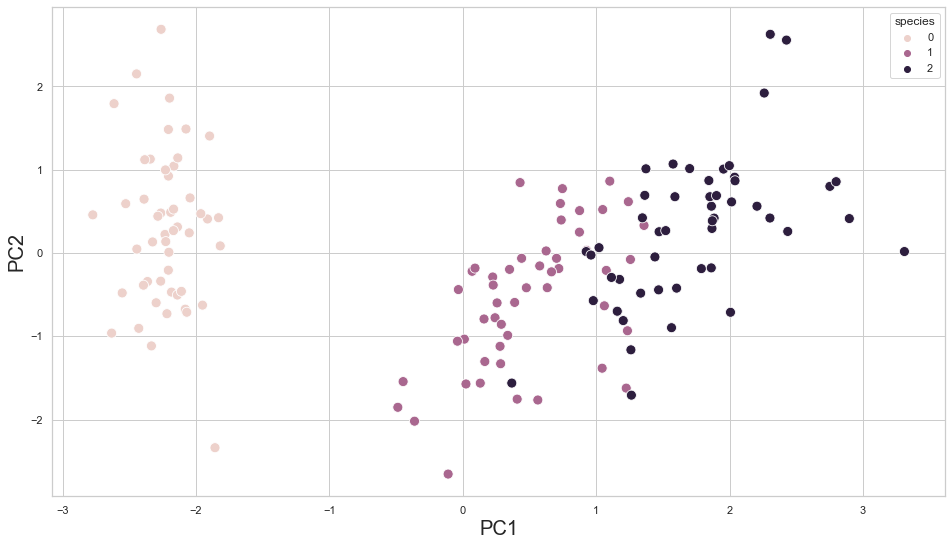

In [67]:
transformed_X = pca_pipeline.transform(X)
data = pd.DataFrame(transformed_X, columns=['PC1', 'PC2'])
data['species'] = y

sns.scatterplot('PC1', 'PC2', data=data, hue='species', s= 100)
plt.xlabel('PC1', size=20)
plt.ylabel('PC2', size=20)
# plt.scatter(data.PC1, data.PC2)
plt.show()

In [66]:
loadings = pca.components_.T 
loading_matrix = pd.DataFrame(loadings, columns=['PC1', 'PC2'], index=X.columns)
loading_matrix

,PC1,PC2
sepal length (cm),0.521066,0.377418
sepal width (cm),-0.269347,0.923296
petal length (cm),0.580413,0.024492
petal width (cm),0.564857,0.066942


### t-SNE

Project the data into a lower dimensional space in which datapoitns tend to be clustered as in the higher dimensional space.
See this [StatQuest video](https://youtu.be/NEaUSP4YerM) for a detailed explanation.

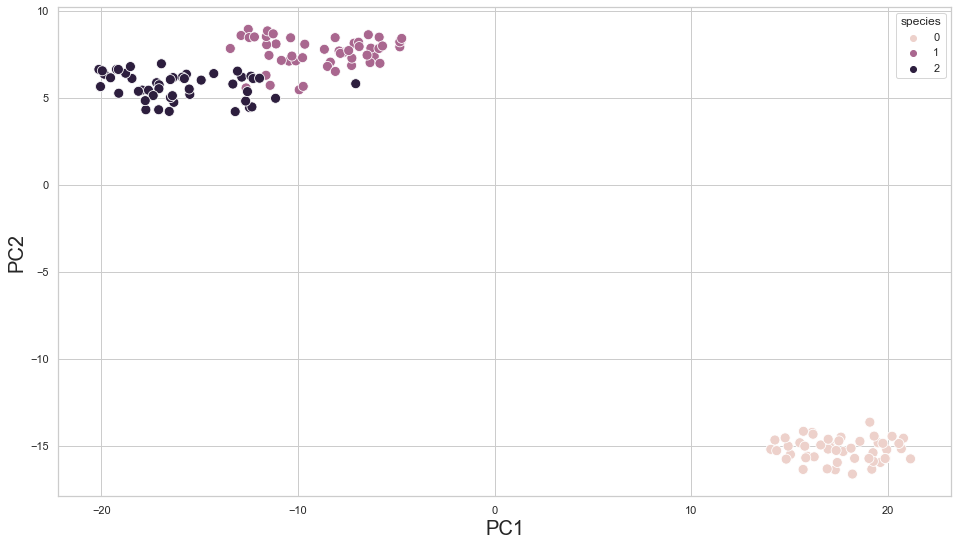

In [74]:
tsne = TSNE(n_components=2, perplexity=30)
transformed_X = tsne.fit_transform(X)
data = pd.DataFrame(transformed_X, columns=['PC1', 'PC2'])
data['species'] = y

sns.scatterplot('PC1', 'PC2', data=data, hue='species', s= 100)
plt.xlabel('PC1', size=20)
plt.ylabel('PC2', size=20)
plt.show()

## Clustering


Find groups (structure) in data without a background truth



### k-means

Clustering where you define the number of clusters ahead of time. Algorithm works iteratively by first randomly choosing assigning each point to a cluster and computing cluster centers. All points are then reassigned based on euclidean distance to centroids. A new centroid is found by averaging the points in each cluster. Process stops after centroids stop moving or some max number of iterations.

See [StatQuest](https://www.youtube.com/watch?v=4b5d3muPQmA) video on the topic.

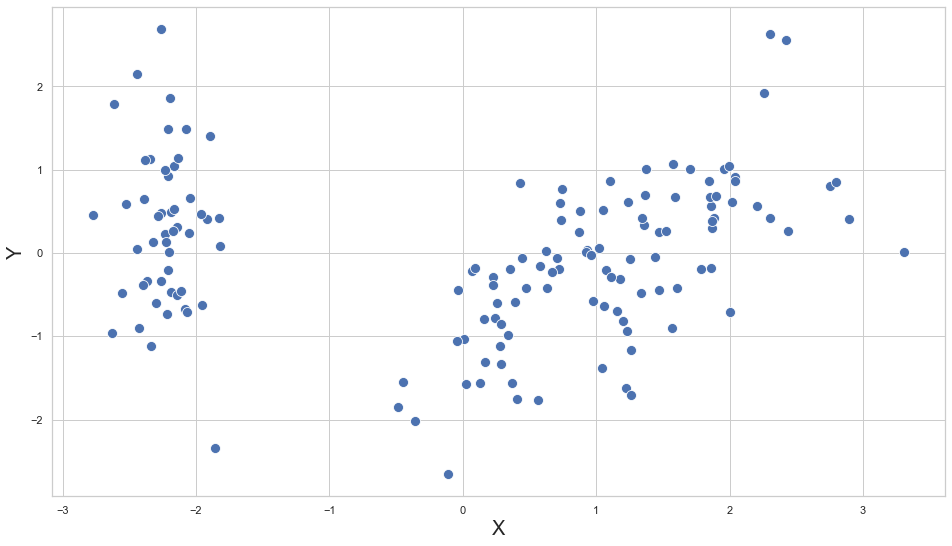

In [76]:
transformed_X = pca_pipeline.transform(X)
data = pd.DataFrame(transformed_X, columns=['PC1', 'PC2'])
data['species'] = y

sns.scatterplot('PC1', 'PC2', data=data, s= 100)
plt.xlabel('X', size=20)
plt.ylabel('Y', size=20)
# plt.scatter(data.PC1, data.PC2)
plt.show()

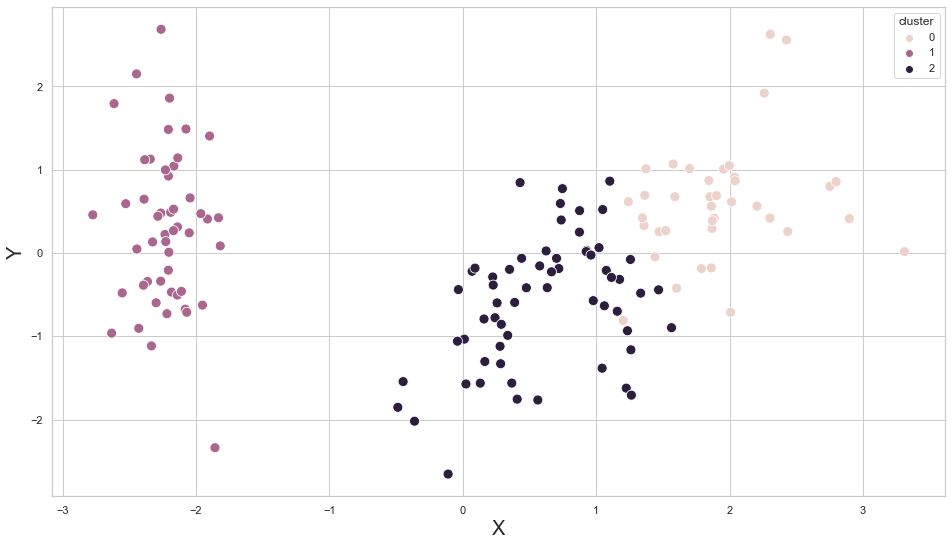

In [81]:
k_means = KMeans(n_clusters=3, 
                 random_state=0)

k_means.fit(X)

data = pd.DataFrame(transformed_X, columns=['PC1', 'PC2'])
data['species'] = y
data['cluster'] = k_means.labels_

sns.scatterplot('PC1', 'PC2', data=data, s= 100, hue='cluster')
plt.xlabel('X', size=20)
plt.ylabel('Y', size=20)
# plt.scatter(data.PC1, data.PC2)
plt.show()

#### Choosing k

**Elbow criteria**

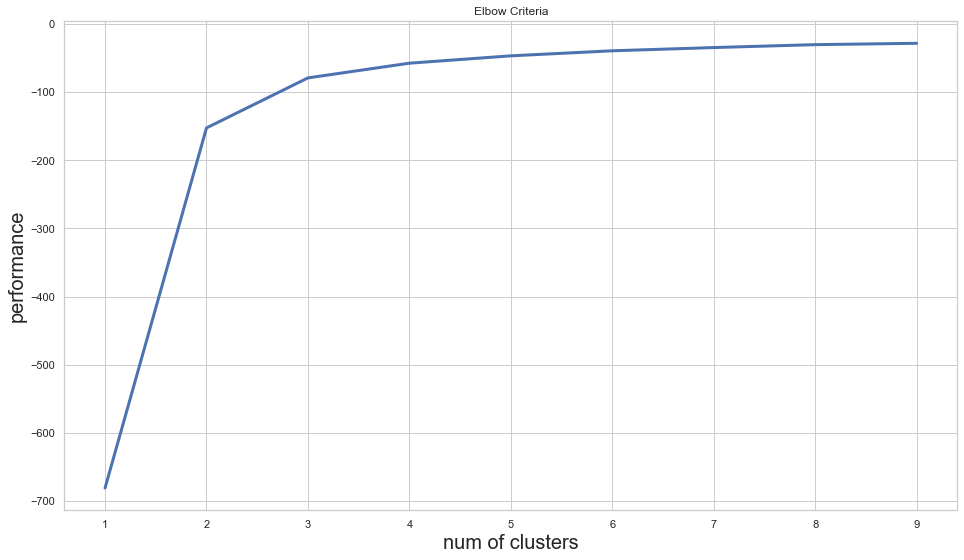

In [88]:
Ks = range(1, 10)
km = [KMeans(n_clusters=i, random_state=0) for i in Ks]
score = [km[i].fit(X).score(X) for i in range(len(km))]
plt.title('Elbow Criteria')
plt.xlabel('num of clusters', size=20)
plt.ylabel('performance', size=20)
plt.plot(Ks, score, lw=3)
plt.show()

**Silhoutte Coefficient** 

In [100]:
silhouette_score(transformed_X, labels=k_means.labels_)

0.488706277807768

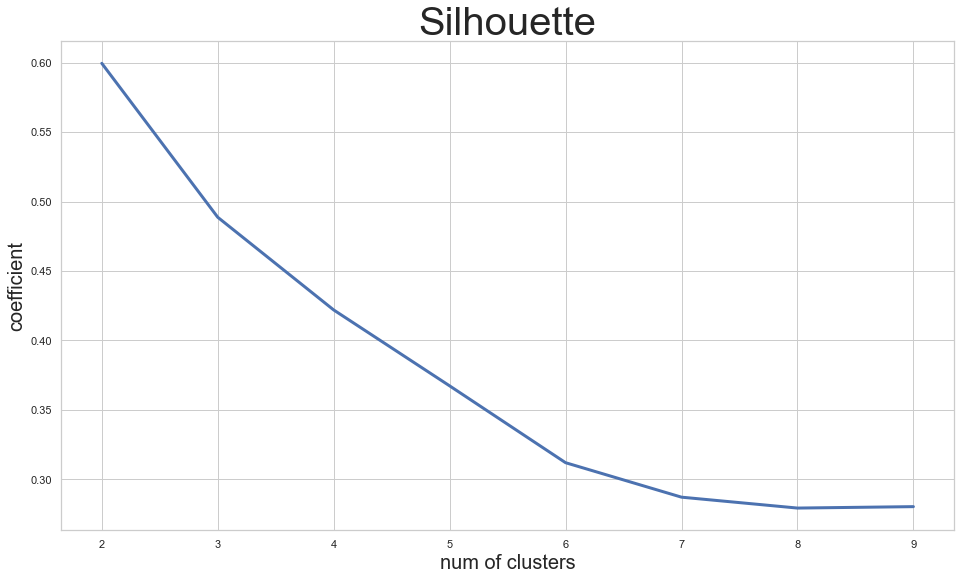

In [101]:
Ks = range(2, 10)
km = [KMeans(n_clusters=i, random_state=0) for i in Ks]
score = [silhouette_score(transformed_X, labels=km[i].fit(X).labels_) for i in range(len(km))]
plt.title('Silhouette', size=40)
plt.xlabel('num of clusters', size=20)
plt.ylabel('coefficient', size=20)
plt.plot(Ks, score, lw=3)
plt.show()

### DBSCAN

https://www.youtube.com/watch?v=sJQHz97sCZ0




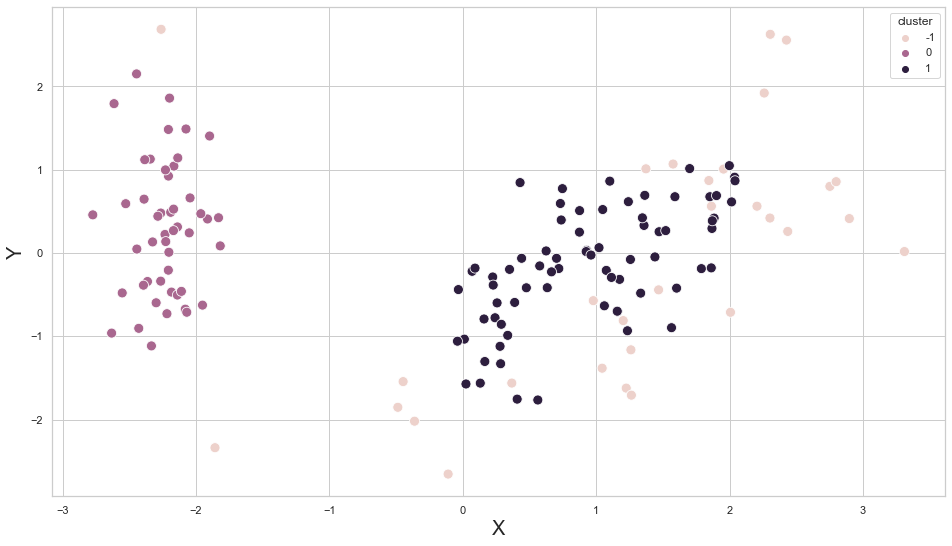

In [106]:
dbscan = DBSCAN(eps=0.5, 
                min_samples=10)

dbscan.fit(X)

data = pd.DataFrame(transformed_X, columns=['PC1', 'PC2'])
data['species'] = y
data['cluster'] = dbscan.labels_

sns.scatterplot('PC1', 'PC2', data=data, s= 100, hue='cluster')
plt.xlabel('X', size=20)
plt.ylabel('Y', size=20)
# plt.scatter(data.PC1, data.PC2)
plt.show()

### Hierarchical Clustering

Yeap, there is an [StatQuest video](https://www.youtube.com/watch?v=7xHsRkOdVwo) on this one too.



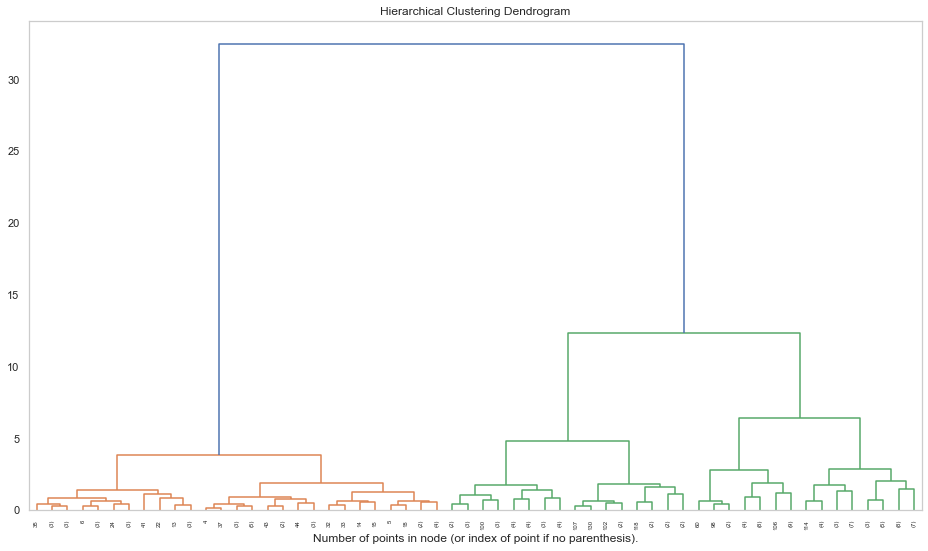

In [114]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, 
                                      model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


iris = load_iris()
X = iris.data

# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model = model.fit(X)
plt.title('Hierarchical Clustering Dendrogram')
plt.grid(b=None)
#plt.axis('off')
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode='level', p=5)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

## References
* [Introduction to Statistical Learning ISL (Chapter 10)](http://faculty.marshall.usc.edu/gareth-james/ISL/ISLR%20Seventh%20Printing.pdf)
* [repo from tdpetrou with materials from ISL](https://github.com/tdpetrou/Machine-Learning-Books-With-Python/tree/master/Introduction%20to%20Statistical%20Learning)
